In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset and split into training and testing sets

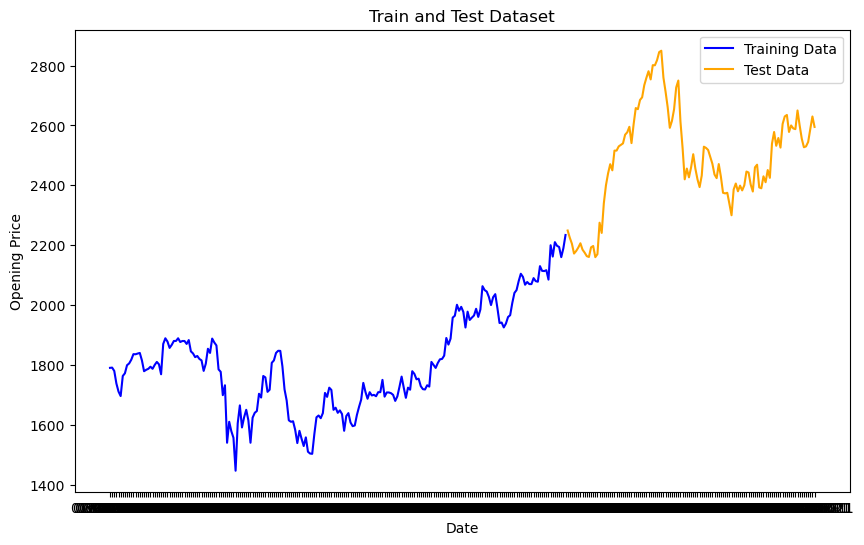

In [7]:
# I 
df = pd.read_csv('asianpaint.csv', index_col='Date', parse_dates=True)

split_index = int(0.65*len(df)) ## Splitting the data by index
train_data = df[:split_index]
test_data = df[split_index:]

plt.figure(figsize=(10,6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.title('Train and Test Dataset')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.show()

### Linear Regression on the stock price data

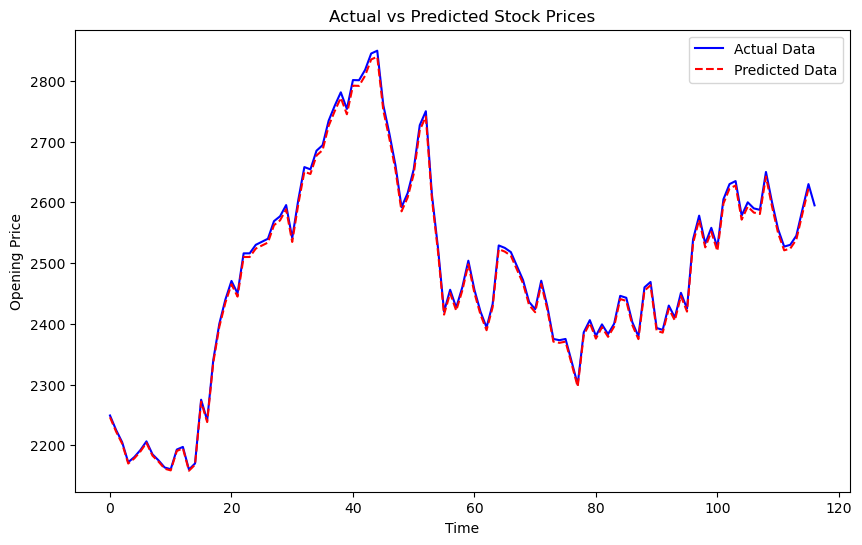

In [8]:
# II 

train_data=train_data.values
test_data=test_data.values

X_train = np.ones((len(train_data) - 1, 2)) ## making the matrix of len the price column
X_train[:,1] = train_data[:-1,0]  ## price data
y_train = train_data[1:,0]  ## time data

lf =np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))  ## y = ((Xt.X)^inv).Xt.Y

X_test=np.ones((len(test_data)-1,2))
X_test[:,1]=test_data[:-1,0]
y_test=test_data[1:,0]

def predict(X, lf):
    return np.dot(X , lf)

predicted_test = predict(X_test,lf)

plt.figure(figsize=(10,6))
plt.plot(test_data, label='Actual Data', color='blue', linestyle='-')
plt.plot(predicted_test, label='Predicted Data', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Opening Price')
plt.legend()
plt.show()

### Calculate RMSE and MAPE for model evaluation

In [9]:
def calculate_mean(values):
    if len(values) == 0:
        return None  
    mean_value = 0
    for i in range(len(values)):
        mean_value+=values[i]
    mean_value/=len(values)
    return mean_value

rmse = np.sqrt(calculate_mean((y_test - predicted_test) ** 2))
rmse_percentage = (rmse / calculate_mean(y_test)) * 100

mape = calculate_mean(np.abs((y_test - predicted_test)) / y_test) * 100

print(f"RMSE: {rmse:.4f}")
print(f"RMSE (%): {rmse_percentage:.2f}%")
print(f"MAPE: {mape:.2f}%")

RMSE: 44.7317
RMSE (%): 1.80%
MAPE: 1.42%
